In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data = load_boston()

In [16]:
%config Completer.use_jedi = False

In [17]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [18]:
df['Target']= data.target

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
X = df.drop(['Target'], axis=1)

In [23]:
y = df.Target

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
import seaborn as sns

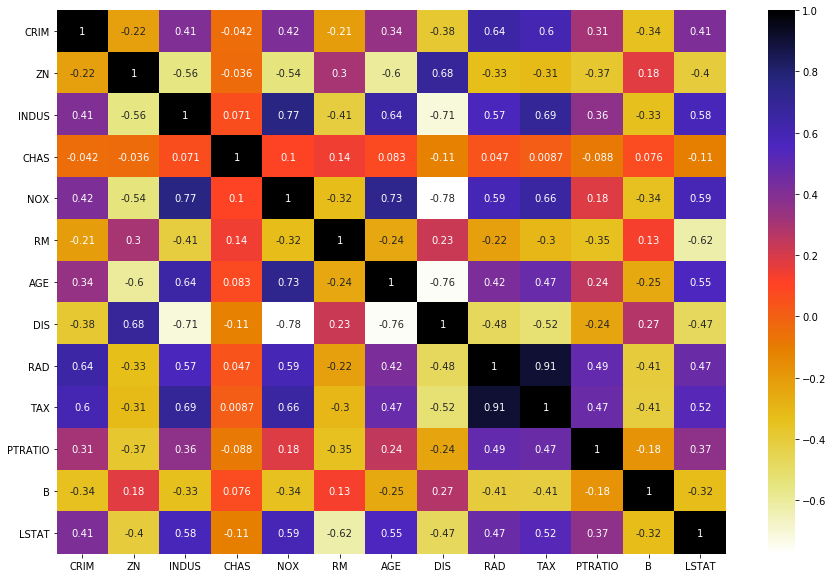

In [29]:
plt.figure(figsize=(15,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap = plt.cm.CMRmap_r)


In [37]:
# selecting the highly correlated columns 
def correlated_columns(df, thresh):
    col_corr = set()
    corr = df.corr()
    for i in range(corr.shape[0]):
        for j in range(i):
            if abs(corr.iloc[i,j]) > thresh:
                col_corr.add(corr.columns[i])
    return col_corr

In [39]:
correlated_columns(X_train,0.7)

{'AGE', 'DIS', 'NOX', 'TAX'}

In [40]:
# These features can be removed from model, as there are alerady related features exist in model. So remove them.


In [41]:
# Another important technique is to remove the zero variance features. which also does not impact the dependent variable. 

In [42]:
from sklearn.feature_selection import VarianceThreshold

In [43]:
var_thre = VarianceThreshold(threshold=0)

In [45]:
var_thre.fit(df)

VarianceThreshold(threshold=0)

In [47]:
var_thre.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
